[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[10.03694253  4.98955555  0.15788729]
 [ 0.56577109  0.3629092  -0.08879767]
 [ 5.00107335  4.79341232  4.92102146]]


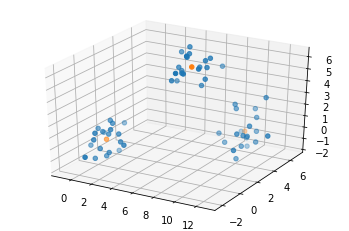

In [61]:
# k-means using sklearn
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(points)

print(kmeans.labels_)
print(kmeans.cluster_centers_)

centroids = kmeans.cluster_centers_

fig = plt.figure()
ax = fig.gca(projection = '3d')

ax.scatter(points[:,0], points[:,1], points[:,2])
ax.scatter(centroids[:,0], centroids[:,1], centroids[:,2])
plt.show()

In [62]:
# K-Means 구현
def euclidean_distance(a,b):   # 두 점 사이의 거리를 구하는 함수
    return ((a-b)**2).sum()**0.5

def kmeans(points, k, max_iters=10):
    # 1. cluster center를 랜덤하게 생성한다 (forgy)
    cluster_centers = points[np.random.choice(points.shape[0], k, replace=False)]
    for iter in range(max_iters):
        # 2. 각각의 point마다 어떤 cluster center와 가장 가까운지 계산 및 할당
        labels = []
        for p in points:
            min_dist = np.inf
            min_cid = -1
            for cid, c in enumerate(cluster_centers):
                dist = euclidean_distance(p, c)
                if dist < min_dist:
                    min_dist = dist
                    min_cid = cid

            labels.append(min_cid)
        labels = np.array(labels)

        # 3. 새로운 labels를 이용해서 cluster_center 새로 계산
        new_cluster_centers = np.zeros_like(cluster_centers)
        counts = np.zeros(k)
    
        for l, p in zip(labels, points):
            new_cluster_centers[l] += p
            counts[l]+=1
  
        for i in range(k):
            new_cluster_centers[i] /= counts[i]

        print("itertion #", iter)
        # 4. cluster에 변화가 없을 경우 종료
        if np.array_equal(cluster_centers, new_cluster_centers):
            break
        else:
            cluster_centers = new_cluster_centers
    return labels, cluster_centers



itertion # 0
itertion # 1
itertion # 2


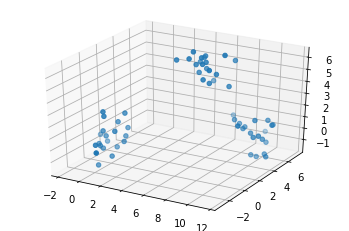

In [63]:
# test
points = [np.random.randn(3) for i in range(20)]
points.extend([np.random.randn(3) + np.array([5,5,5]) for _ in range(20)])
points.extend([np.random.randn(3) + np.array([10,5,0]) for _ in range(20)])
points = np.array(points)

# kmeans 실행
labels, cluster_centers = kmeans(points, 3)
fig = plt.figure()
ax = fig.gca(projection='3d')

x = points[:,0]
y = points[:,1]
z = points[:,2]

ax.scatter(x,y,z)
plt.show()

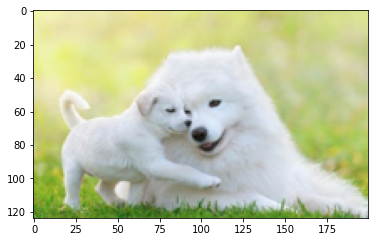

In [64]:
# 이미지 처리 응용
from PIL import Image

im = Image.open("/content/다운로드.jpeg")

width = 200
height = im.height * width // im.width
im = im.resize((width, height))

plt.imshow(im)
plt.show()

In [65]:
pixels = np.array(im).reshape(-1,3).astype(np.float32)

labels, cluster_centers = kmeans(pixels, 10)

itertion # 0
itertion # 1
itertion # 2
itertion # 3
itertion # 4
itertion # 5
itertion # 6
itertion # 7
itertion # 8
itertion # 9


In [66]:
# 모든 픽셀의 색을 cluster_centers 중 하나로 선택
for l, i in zip(labels, range(pixels.shape[0])):
    pixels[i] = cluster_centers[l] 

pixels = pixels.astype(np.uint8)
pixels

array([[232, 231, 168],
       [232, 231, 168],
       [232, 231, 168],
       ...,
       [197, 205, 213],
       [197, 205, 213],
       [140, 146, 132]], dtype=uint8)

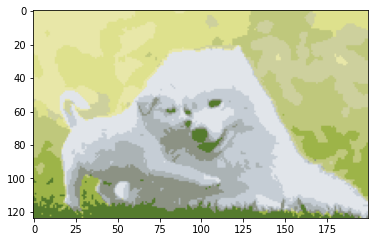

In [67]:
# 바뀐 그림 출력
im_remastered = Image.fromarray(pixels.reshape(im.height, im.width, 3), 'RGB')
plt.imshow(im_remastered)
plt.show()